In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from tqdm import tqdm
from collections import Counter
import networkx as nx


In [34]:
data_file = open('../data/Wiki-Vote.txt', 'r')
lines = data_file.readlines()
start_ptr = 0
for i in range(len(lines)):
    if(lines[i][0] == '#'):
        start_ptr += 1
node_set = set()
for i in range(start_ptr, len(lines)):
    split1 = lines[i].split('\t')
    node1 = int(split1[0])
    node2 = int(split1[1][:(len(split1[1]) - 1)])
    node_set.add(node1)
    node_set.add(node2)
num_nodes = len(node_set)
node_num = 0
node_id_to_num = {}
node_num_to_id = {}
for node_id in node_set:
    node_id_to_num[node_id] = node_num
    node_num_to_id[node_num] = node_id
    node_num += 1
edge_list = []
adjacency_matrix = np.zeros((num_nodes, num_nodes))
for i in range(start_ptr, len(lines)):
    split1 = lines[i].split('\t')
    node1_id = int(split1[0])
    node2_id = int(split1[1][:(len(split1[1]) - 1)])
    node1_num = node_id_to_num[node1_id]
    node2_num = node_id_to_num[node2_id]
    edge_list.append([node1_num, node2_num])
    adjacency_matrix[node1_num][node2_num] = 1

In [35]:
graph1 = nx.read_edgelist("../data/Wiki-Vote.txt", create_using=nx.DiGraph, nodetype=int)
graph = nx.DiGraph()
graph.add_nodes_from(list(node_id_to_num.values()))
graph.add_edges_from(edge_list)

In [36]:
graph1

In [37]:
graph

In [49]:
nx_in_degrees = dict(graph.in_degree())
nx_out_degrees = dict(graph.out_degree())

In [52]:
clusterings = dict(nx.clustering(graph))

our implementation

In [41]:
num_edges = len(edge_list)
incoming_edges = np.sum(adjacency_matrix, axis=0)
in_degrees = {node_num:in_deg for node_num, in_deg in enumerate(incoming_edges)}    
outgoing_edges = np.sum(adjacency_matrix, axis=1)
out_degrees = {node_num:out_deg for node_num, out_deg in enumerate(outgoing_edges)}

In [42]:
avg_in_degree = np.average(incoming_edges)
avg_out_degree = np.average(outgoing_edges)
max_in_degree_node_id = node_num_to_id[max(in_degrees, key= lambda x: in_degrees[x])]
max_in_degree = in_degrees[node_id_to_num[max_in_degree_node_id]]
max_out_degree_node_id = node_num_to_id[max(out_degrees, key= lambda x: out_degrees[x])]
max_out_degree = out_degrees[node_id_to_num[max_out_degree_node_id]]
total_possible_edges = (num_nodes * (num_nodes - 1))
network_density = num_edges / total_possible_edges

In [43]:
print("For the network based on chosen dataset :" + "\n" \
    f"-> Number of Nodes  : {num_nodes}" + "\n" \
    f"-> Number of edges  : {num_edges}" + "\n" \
    f"-> Avg. In-Degree   : {avg_in_degree}"+ "\n" \
    f"-> Avg. Out-Degree  : {avg_out_degree}"+ "\n" \
    f"-> Max In-Deg Node  : Node ID - {max_in_degree_node_id} | In-Degree = {max_in_degree}"+ "\n" \
    f"-> Max Out-Deg Node : Node ID - {max_out_degree_node_id} | Out-Degree = {max_out_degree}"+ "\n" \
    f"-> Network Density  : {network_density}")

For the network based on chosen dataset :
-> Number of Nodes  : 7115
-> Number of edges  : 103689
-> Avg. In-Degree   : 14.573295853829936
-> Avg. Out-Degree  : 14.573295853829936
-> Max In-Deg Node  : Node ID - 4037 | In-Degree = 457.0
-> Max Out-Deg Node : Node ID - 2565 | Out-Degree = 893.0
-> Network Density  : 0.0020485375110809584


In [44]:
und_adjacency_matrix = np.zeros((num_nodes, num_nodes))
for edge in edge_list:
    node1_num = edge[0]
    node2_num = edge[1]
    und_adjacency_matrix[node1_num][node2_num] = 1
    und_adjacency_matrix[node2_num][node1_num] = 1

In [45]:
neighbours = {}
local_clustering_coeff = {}

for node in tqdm(range(num_nodes)):
    neighbourhood_set = set()
    for j in range(num_nodes):
        if(und_adjacency_matrix[node][j] == 1):
            neighbourhood_set.add(j)
    neighbours[node] = neighbourhood_set
    num_neighbours = len(neighbourhood_set)
    # print(f"Node {node} | Neighbours {num_neighbours}")
    num_neighbourhood_links = 0
    for neighbour in neighbourhood_set:
        for j in neighbourhood_set:
            if(j != neighbour and und_adjacency_matrix[neighbour][j]):
                num_neighbourhood_links += 1
    # print(f"Node {node} | Neighbours {num_neighbours} | links = {num_neighbourhood_links}")
    num_neighbourhood_links = num_neighbourhood_links / 2
    if(num_neighbourhood_links == 0):
        local_clustering_coeff_node = 0
    else:
        local_clustering_coeff_node = num_neighbourhood_links / ((num_neighbours * (num_neighbours - 1)) / 2)
    local_clustering_coeff[node] = local_clustering_coeff_node


100%|██████████| 7115/7115 [00:29<00:00, 242.35it/s]


In [46]:
def plot_distribution(distribution, xlabel, ylabel, title, save=False):
    distribution_sorted = sorted(distribution.items(), key= lambda x:x[0])
    print(max(distribution_sorted, key=lambda x : x[1]))
    # xlabel = "Out-Degree" if flag=="Out" else "In-Degree"
    # ylabel = "Frequency"
    plt_x = [x[0] for x in distribution_sorted]
    plt_y = [y[1] for y in distribution_sorted]
    plt.plot(plt_x, plt_y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    if(save == True):
        plt.savefig(f"{title}.png", bbox_inches='tight', facecolor='w')
    plt.show()

In [53]:
in_degree_distribution = dict(Counter(list(in_degrees.values())))
out_degree_distribution = dict(Counter(list(out_degrees.values())))
clustering_coeff_distribution = dict(Counter(list(local_clustering_coeff.values())))
nx_in = dict(Counter(list(nx_in_degrees.values())))
nx_out = dict(Counter(list(nx_out_degrees.values())))
nx_clust = dict(Counter(list(clusterings.values())))

(0.0, 4734)


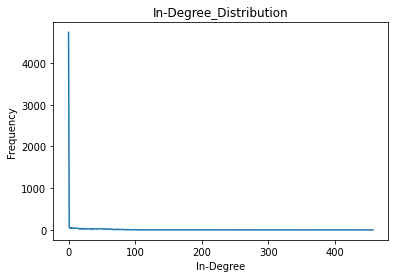

(0, 4734)


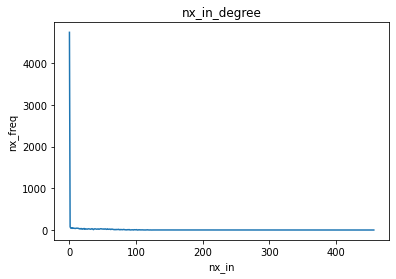

In [54]:
plot_distribution(in_degree_distribution, "In-Degree", "Frequency", "In-Degree_Distribution")
plot_distribution(nx_in, "nx_in", "nx_freq", "nx_in_degree")

(1.0, 2382)


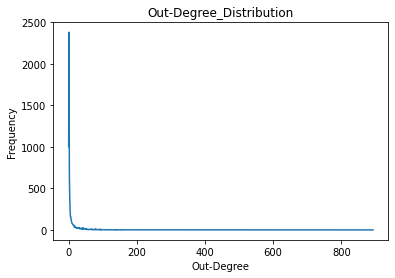

(1, 2382)


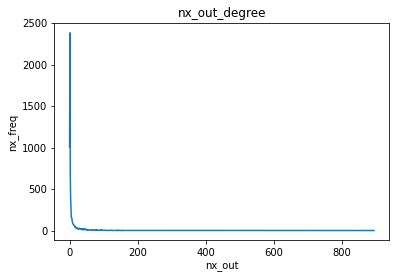

In [56]:
plot_distribution(out_degree_distribution, "Out-Degree", "Frequency", "Out-Degree_Distribution")
plot_distribution(nx_out, "nx_out", "nx_freq", "nx_out_degree")

(0, 3140)


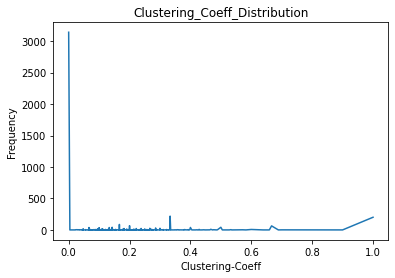

(0, 3140)


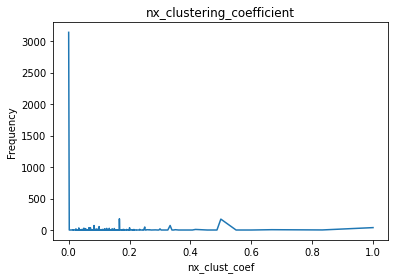

In [57]:
plot_distribution(clustering_coeff_distribution, "Clustering-Coeff", "Frequency", "Clustering_Coeff_Distribution")
plot_distribution(nx_clust, "nx_clust_coef", "Frequency", "nx_clustering_coefficient")

In [62]:
cnts = 0
for i in range(num_nodes):
    if(clusterings[i] != local_clustering_coeff[i]):
        print(f"At {i} --> nx = {clusterings[i]} | mine = {local_clustering_coeff[i]}")
        cnts += 1
print(cnts)
        # print(f"")

At 0 --> nx = 0.12745098039215685 | mine = 0.2196078431372549
At 1 --> nx = 0.13669950738916256 | mine = 0.23399014778325122
At 2 --> nx = 0.191699604743083 | mine = 0.34782608695652173
At 3 --> nx = 0.03712770692624775 | mine = 0.06395881239698012
At 4 --> nx = 0.09239130434782608 | mine = 0.15217391304347827
At 5 --> nx = 0.05986386528171231 | mine = 0.09788359788359788
At 6 --> nx = 0.05416666666666667 | mine = 0.09907407407407408
At 7 --> nx = 0.08746038034865293 | mine = 0.1443001443001443
At 8 --> nx = 0.02612160941473519 | mine = 0.04861546944890859
At 9 --> nx = 0.051201923076923075 | mine = 0.09471153846153846
At 10 --> nx = 0.11818181818181818 | mine = 0.21818181818181817
At 11 --> nx = 0.030740568234746156 | mine = 0.05604719764011799
At 12 --> nx = 0.03357983073581255 | mine = 0.05983728997691443
At 13 --> nx = 0.11904761904761904 | mine = 0.21904761904761905
At 14 --> nx = 0.08787878787878788 | mine = 0.15757575757575756
At 15 --> nx = 0.12878787878787878 | mine = 0.212121